In [307]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.model_selection import train_test_split

**MLP class**

In [308]:
#created a class MLP which has attributes number of iterations(k),learning rate(lr),input layer dimensions(ip_dim),output layer dimensions(op_dim),
# weights and bias of hidden layer(w1,b1), weights and bias of output layer(w2,b2)


class MLP:
  def __init__(self,no_of_iters,learning_rate,input_dim,output_dim,hidden_lay_dim):
    self.k=no_of_iters
    self.lr=learning_rate
    self.ip_dim=input_dim
    self.op_dim=output_dim
    self.hid_dim=hidden_lay_dim
    self.w1=torch.rand(self.ip_dim,self.hid_dim)
    self.w2=torch.rand(self.hid_dim,self.op_dim)
    self.b1=torch.zeros(self.hid_dim,self.op_dim)
    self.b2=torch.zeros(self.op_dim,self.op_dim)




#activation function is sigmoid function
  def sigmoid_fn(self,x):
    y=1/(1+torch.exp(-x))
    return y




#loss function is (y_predicted-y)**4    
  def loss_fn(self,ypred,y):
    return (ypred-y)**4




  #function to calculate back propagation
  def back_propagation(self,s1,x1,s2,x2,x,y):
     
    #z1 is  d/ds1(sigmoid_fn(s1)) where s1=w1^Tx+b1
    z1=torch.zeros(self.hid_dim,self.hid_dim)
    for i in range(self.hid_dim):
      z1[i][i]=(torch.exp(s1)/(1+torch.exp(s1))**2)[i]

    #z2 is  d/ds2(sigmoid(s2)) where s2=w2^Tx1+b2
    z2=torch.zeros(self.op_dim,self.op_dim)
    for i in range(self.op_dim):
      z2[i][i]=(torch.exp(s2)/(1+torch.exp(s2))**2)[i]

    # dx2=dL/dx2      ds2=dL/ds2    dw2=dL/dw2    db2=dL/db2
    #back propagation to find dL/dw2 and dL/db2
    dx2=4*(x2-y)**3
    ds2=z2@dx2
    dw2=x1@ds2.reshape(-1,self.w2.size(1))
    db2=ds2


    # dx1=dL/dx1      ds1=dL/ds1   dw1=dL/dw1    db1=dL/db1
    #back propagation to find dL/dw1 and dL/db1
    dx1=self.w2@ds2
    ds1=z1@dx1
    dw1=x@ds1.reshape(-1,self.w1.size(1))
    db1=ds1

    return dw2,db2,dw1,db1





  

  def single_layer_mlp(self,X,y):
    
    for j in range(self.k):
      loss=0
      for i in range(X.shape[0]):
          #forward propagation.
          z=X[i].reshape(X[i].size(0),-1)
          s1=(torch.transpose(self.w1,0,1)@z) + self.b1
          x1=self.sigmoid_fn(s1)
          s2=(torch.transpose(self.w2,0,1)@x1) + self.b2
          x2=self.sigmoid_fn(s2)

          #calling back propagation function
          dw2,db2,dw1,db1=self.back_propagation(s1,x1,s2,x2,X[i].reshape(X[i].size(0),-1),y[i])
          

          #update weights and bias
          self.w1-= self.lr*dw1
          self.w2-= self.lr*dw2
          self.b1-= self.lr*db1
          self.b2-= self.lr*db2

          #compute loss
          loss+=self.loss_fn(x2,y[i])
      if (j+1)%50==0:
        print('At ',j+1, 'th iteration loss=',loss/500)

**DATASET CREATION**

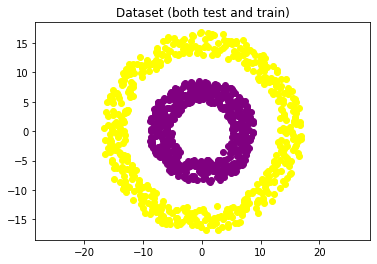

In [309]:
#dataset creation


r = np.random.uniform([[5], [13]], [[9], [17]], size=(2, 500))
angle = np.linspace(0, 2 * np.pi , 500 )
x1 = [r[0] * np.cos(angle), r[1] * np.cos(angle)]
y1 = [r[0] * np.sin(angle), r[1] * np.sin(angle)]
plt.axis('equal')
plt.title('Dataset (both test and train)')
plt.scatter(x1[0], y1[0], c='purple')
plt.scatter(x1[1], y1[1], c='yellow')
plt.show()

In [310]:
#splitting train and test data sets


X_train1, X_test1,y_train1, y_test1 = train_test_split(x1[0],y1[0] ,random_state=104, test_size=0.5, shuffle=True)
X_train2, X_test2,y_train2, y_test2 = train_test_split(x1[1],y1[1] ,random_state=104, test_size=0.5, shuffle=True)

In [311]:
#train data set creation

X=torch.empty(500,2)
X[::2,0] = torch.from_numpy(X_train1)
X[1::2,0] = torch.from_numpy(X_train2)
X[::2,1] = torch.from_numpy(y_train1)
X[1::2,1] = torch.from_numpy(y_train2)
y=np.empty(500,)
y[::2] = 1.0
y[1::2] = 0.0

In [312]:
#test data set creation

X_test=torch.empty(500,2)
X_test[::2,0] = torch.from_numpy(X_test1)
X_test[1::2,0] = torch.from_numpy(X_test2)
X_test[::2,1] = torch.from_numpy(y_test1)
X_test[1::2,1] = torch.from_numpy(y_test2)
y_test=torch.empty(500,)
y_test[::2] = 1.0
y_test[1::2] = 0.0

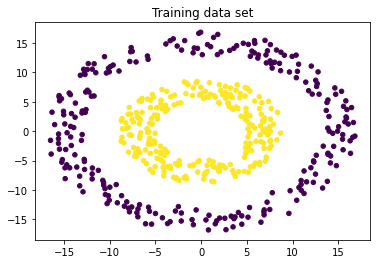

In [313]:
#plot of training data set

plt.title("Training data set")
plt.scatter(X[:, 0], X[:, 1], c=y, s=20)
plt.show()

**MLP training**

In [314]:
#crating mlp (class) object and implementing neural network

p=MLP(300,0.01,2,1,4)
p.single_layer_mlp(X,y)


At  50 th iteration loss= tensor([[0.0620]])
At  100 th iteration loss= tensor([[0.0580]])
At  150 th iteration loss= tensor([[0.0507]])
At  200 th iteration loss= tensor([[0.0429]])
At  250 th iteration loss= tensor([[0.0291]])
At  300 th iteration loss= tensor([[0.0181]])


In [315]:
#print weights and bias

print('weight1=',p.w1)
print('weight2=',p.w2)
print('bias1=',p.b1)
print('bias2=',p.b2)

weight1= tensor([[-0.1863,  0.1560, -0.3981,  0.2876],
        [ 0.3440,  0.2921, -0.0246,  0.2919]])
weight2= tensor([[-2.8545],
        [ 2.1249],
        [ 2.4088],
        [ 0.2231]])
bias1= tensor([[-3.1175],
        [ 1.8866],
        [ 2.7605],
        [ 0.5222]])
bias2= tensor([[-2.7880]])


**ACCURACY CALCULATION**

In [316]:
#Accuracy calculation


miss=0     
for i in range(X_test.size(0)):    
    s1=(torch.transpose(p.w1,0,1)@X_test[i]).reshape(p.w1.size(1),-1) + p.b1
    x1=p.sigmoid_fn(s1)
    s2=(torch.transpose(p.w2,0,1)@x1).reshape(p.w2.size(1),-1)  + p.b2
    
    x2=0.0
    #print(p.sigmoid_fn(s2).item(),p.sigmoid_fn(s2).item()>0.5)
    if p.sigmoid_fn(s2).item()>0.5:
      x2=1.0
    #print(x2,y_test[i].item())
    if x2!=y_test[i].item():
      miss=miss+1
print('accuracy=',(500-miss)/500)


accuracy= 1.0
